# EDA ON TITANIC

In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [148]:
#Load Titanic Dataset from seaborn
titanic = sns.load_dataset('titanic')
#Preview the dataset
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# UNDERSTANDNG THE DATASET 

In [149]:
#Shape of the dataset
"Shape of the dataset:",titanic.shape

#Info of the dataset
"Info of the dataset",titanic.info()

#Summary statistics of the dataset
"Summary statistics of the dataset",titanic.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


('Summary statistics of the dataset',
          survived      pclass         age       sibsp       parch        fare
 count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
 mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
 std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
 min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
 25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
 50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
 75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
 max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200)

# Checking Missing Values

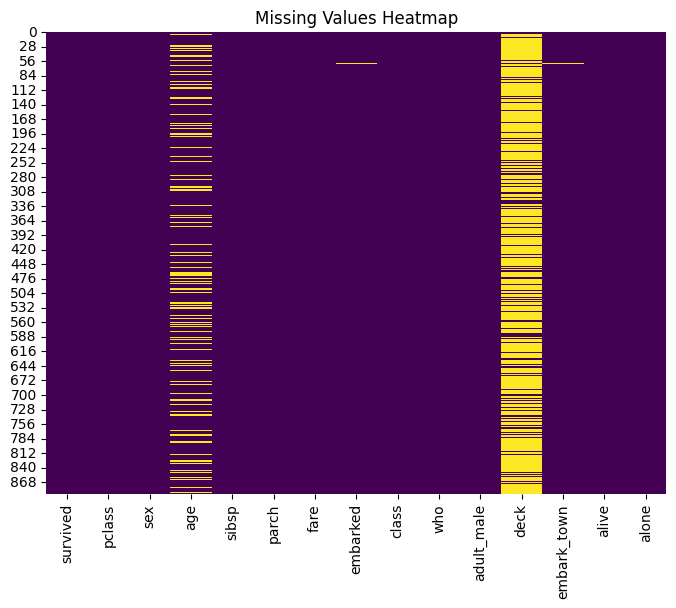

In [150]:
#Missing value count
titanic.isnull().sum()

#Visualizing missing values using heatmap
plt.figure(figsize=(8,6))
sns.heatmap(titanic.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# CLEAN THE DATA

In [151]:
#Before cleaning
print("Before cleaning:\n",titanic.isnull().sum())

Before cleaning:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [152]:
# Fill missing age
titanic['age']=titanic['age'].fillna(titanic['age'].median())

# Fill missing embarked
titanic['embarked'] =titanic['embarked'].fillna(titanic['embarked'].mode()[0])

#Fill missing embark_town
titanic['embark_town'] = titanic['embark_town'].fillna(titanic['embark_town'].mode()[0])
#Drop deck column due to high missing values
titanic.drop(columns='deck', inplace=True)

# Verify cleaning
print("After cleaning:\n",titanic.isnull().sum())


After cleaning:
 survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


# EDA VISUALIZATIONS


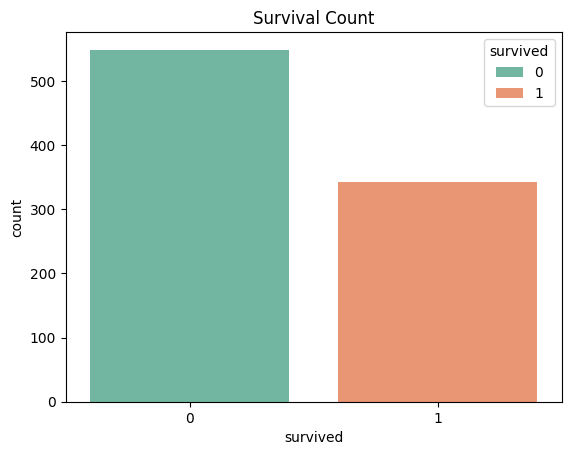

In [153]:
# Surival Count Plot
sns.countplot(x='survived',hue='survived', data=titanic, palette='Set2')
plt.title("Survival Count")
plt.show()
#0=Not Survived, 1=Survived

In [135]:
## Insight: 
###  (Not Survived) : around 550 passengers.
###  (Survived) :  around 340 passengers.

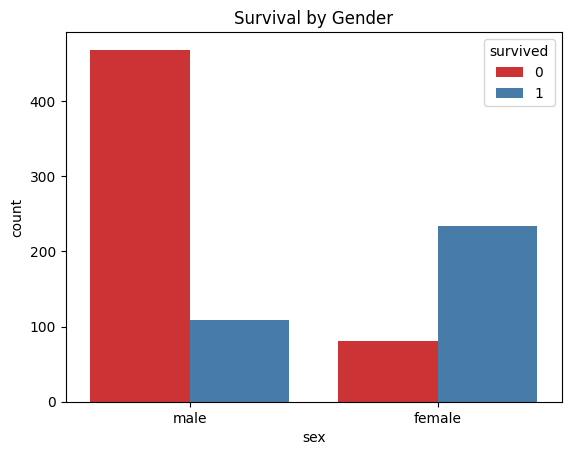

In [154]:
# Survival by Gender
sns.countplot(x='sex', hue='survived', data=titanic, palette='Set1')
plt.title("Survival by Gender")
plt.show()
# 0=Not Survived, 1=Survived

In [ ]:
## INSIGHT:
### Male bar (0) is very high → most men did not survive.
### Female bar (1) is higher than female bar (0) → most women survived.

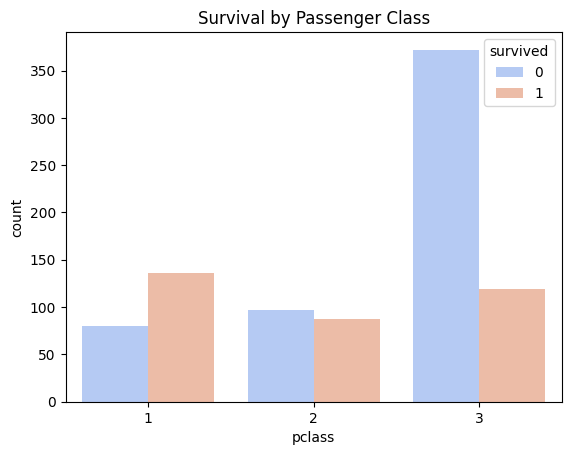

In [155]:
### Survival by Passenger Class
sns.countplot(x='pclass', hue='survived', data=titanic, palette='coolwarm')
plt.title("Survival by Passenger Class")
plt.show()
# 0=Not Survived, 1=Survived

In [ ]:
## Insight:
### Pclass = 1 → survival rate is highest.
### Pclass = 3 → very low survival rate.
### Pclass = 2 → moderate survival rate.

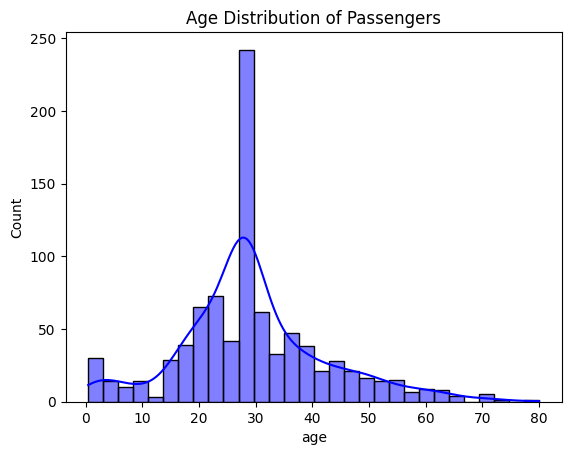

In [156]:
#Age Distribution
sns.histplot(titanic['age'], kde=True, bins=30, color='blue')
plt.title("Age Distribution of Passengers")
plt.show()

In [ ]:
## Insight:
### Most passengers are between ages 20-40.
### Few elderly passengers (60+) on board.
### Children (0-10) also present but in smaller numbers.
### Overall, age distribution is right-skewed with a peak around 25-30 years.

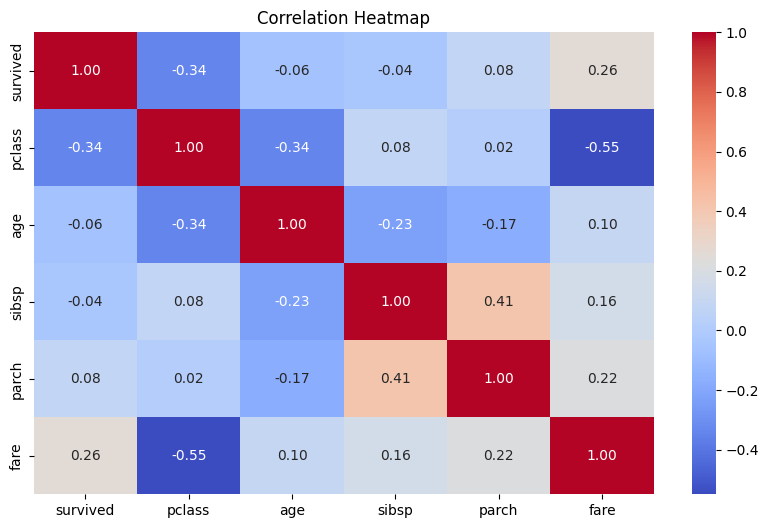

In [157]:
# Correlation Heatmap - Fix
plt.figure(figsize=(10,6))
numeric_data = titanic.select_dtypes(include=['float64', 'int64'])
# Create the heatmap
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [158]:
## Insight for Correlation Heatmap:
### Pclass and Fare have a moderate negative correlation with Survived, indicating that passengers in higher classes and those who paid higher fares had better survival rates.
### Age has a slight negative correlation with Survived, suggesting that younger passengers had a marginally better chance of survival.
### SibSp and Parch show very weak correlations with Survived, indicating that having siblings/spouses or parents/children aboard had little impact on survival chances.
### Overall, the correlations suggest that socio-economic status (Pclass and Fare) played a more significant role in survival than family connections or age.


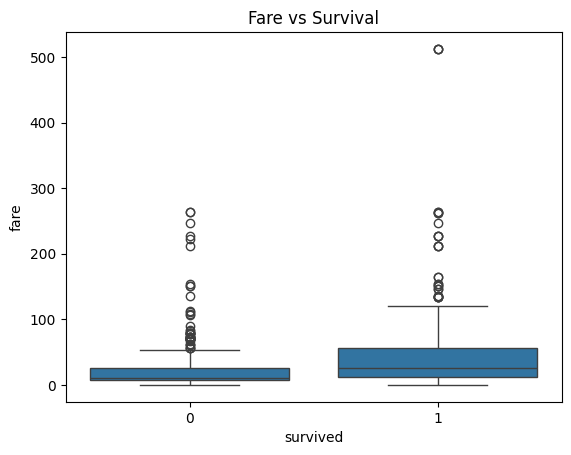

In [159]:
# Fare vs Survival
sns.boxplot(x='survived', y='fare', data=titanic)
plt.title("Fare vs Survival")
plt.show()


In [160]:
#Insights:
### Survived passengers (1) generally paid higher fares than non-survivors (0).
### There are some outliers in fare prices for both groups, but the median fare for survivors is noticeably higher than that for non-survivors, indicating a potential link between fare amount and survival chances.
### Overall, higher fare seems to correlate with better survival odds.

Quick Summary:

1. Women and 1st-class passengers had the highest survival rates.

2. Higher fares increased chances of survival.

3. Younger passengers had slightly better survival chances.

4. 3rd-class males had the lowest survival rate.